# Feature Selection and Feature Engineering with the Pima Indians Diabetes Dataset

**Description:**
This notebook covers feature selection and feature engineering techniques applied to the Pima Indians Diabetes dataset using Python libraries like Pandas, Scikit-learn, and NumPy. The dataset contains several medical predictor variables and one target variable that indicates whether or not a patient has diabetes.

The dataset can be found on the Kaggle website: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Sections:
1. Loading and Exploring the Dataset
2. Handling Missing Values
3. Feature Engineering
4. Feature Selection
5. Model Building for Comparison


In [25]:
# This command installs the 'ydata-profiling' library, which is used to generate comprehensive data profiles.
# It helps in quickly understanding the structure and quality of your dataset by providing detailed reports.

!pip install -U ydata-profiling

## 1. Loading and Exploring the Dataset

In [26]:
# 1. Loading and Exploring the Dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Preview the data
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Checking for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Ou

### EDA using Pandas Profiling

What is EDA? Exploratory Data Analysis (EDA) is an initial step in data analysis where you summarize the main characteristics of your data, identify patterns, and potentially spot anomalies. It helps you gain a better understanding of your dataset before applying more complex modeling techniques.

Pandas Profiling for EDA

Pandas Profiling is a Python library that automates the process of generating EDA reports for your datasets. It creates interactive HTML reports that provide a comprehensive overview of your data, including:

* Overview: A summary of the dataset, including the number of variables, observations, missing values, and data types.
* Variables: Detailed information about each variable, such as its distribution, statistics (mean, median, standard deviation), and potential outliers.
* Correlations: A visualization of the relationships between variables using heatmaps or scatter plots.
* Missing Values: An analysis of missing values in the dataset, including their patterns and potential impact.
* Interactions: Interactive plots that allow you to explore the relationships between variables in more detail.

In [27]:
#file = ProfileReport(df)
#file.to_file(output_file='output.html')

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Instructions for **Viewing the Report**

The profiling report has been saved as `output.html`. To open and navigate through the report, follow these steps:

1. **Locate the File**:  
   The file `output.html` should be saved in your current working directory. You can confirm the location by running the following command in a new cell:
   ```python
   import os
   os.getcwd()

2. **Open the Report**:
    
    Navigate to the directory where output.html is saved on your computer.
    Double-click the output.html file to open it in your web browser.
    
3. **Explore the Report**:

    The report contains various sections, such as overview, variables, correlations, missing values, and more. Use the table of contents on the left side of the page to quickly jump to different sections.
    You can scroll through the report to explore summaries, distributions, and correlations of your dataset's variables.

In [29]:
import os
os.getcwd()

'/content'

The profile generated by ProfileReport from the ydata-profiling library can be thought of as a **DASHBOARD** in the sense that it provides an interactive, comprehensive overview of the dataset.


## 2. Handling Missing Values

In [30]:
# 2. Handling Missing Values
# In this dataset, there are no missing values by default, but if any were present, we would handle them here.


## 3. Feature Engineering

In this section, you'll perform feature engineering on the dataset by scaling the features.
The `StandardScaler` is a tool that helps normalize data, making it easier for machine learning models to process.
Your task is to scale all the numerical features except for the target variable `Outcome`.
Use the Pandas DataFrame structure to store the scaled data.

In [31]:
# Task 1: Scale the features (excluding the 'Outcome' column)
# HINT: Use StandardScaler() from sklearn and apply it to the dataset after dropping 'Outcome'
#       Then, create a new DataFrame to hold the scaled features along with the 'Outcome' column.
#first i will seperate the feature and target variable
f = df.drop(columns=['Outcome'])
t = df['Outcome']



# --- Your Code Starts Here ---
    ### Apply scaler to the features
scaler=StandardScaler()
f_scaled = scaler.fit_transform(f)
f_scaled_df = pd.DataFrame(f_scaled, columns=f.columns)
    ### Add back the 'Outcome' column to the scaled DataFrame
scaled_df = pd.concat([f_scaled_df, t.reset_index(drop=True)], axis=1)
print(scaled_df.head())
# --- Your Code Ends Here ---


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In this task, you will create new categorical features from continuous ones.
For example, you can create categories for BMI, such as 'Underweight', 'Normal', 'Overweight', and 'Obese'.
This helps group continuous values into meaningful categories that can be easier for analysis.

In [32]:
# Task 2: Create new categories for the 'BMI' feature
# HINT: Use pd.cut() to bin the values in the 'BMI' column into the following ranges:
#       0-18.5 = 'Underweight', 18.5-24.9 = 'Normal', 24.9-29.9 = 'Overweight', and 29.9+ = 'Obese'.
#       Add the resulting categories as a new column in the scaled DataFrame.
# Define the BMI ranges and labels
bins_range_bmi = [0, 18.5, 24.9, 29.9, float('inf')]
label_categories_bmi = ['Underweight', 'Normal', 'Overweight', 'Obese']

# --- Your Code Starts Here ---

    ### Create a new column 'BMI_Category' based on BMI ranges, and added the column to the scaled_df that i did before( here the values are scaled)
scaled_df['BMI_Classification'] = pd.cut(df['BMI'], bins=bins_range_bmi, labels=label_categories_bmi, right=True)

    ### Print the first few rows of the DataFrame to check the new feature
print(scaled_df[['BMI', 'BMI_Classification']].head())
# --- Your Code Ends Here ---

        BMI BMI_Classification
0  0.204013              Obese
1 -0.684422         Overweight
2 -1.103255             Normal
3 -0.494043         Overweight
4  1.409746              Obese


## 4. Feature Selection

### Correlation Matrix

Why Correlation Matrix is Important for Feature Selection:

* Identifying Redundancy: The correlation matrix helps in identifying features that are highly correlated with each other. Highly correlated features provide redundant information. Including redundant features in your model can lead to overfitting and can unnecessarily increase model complexity.
* Multicollinearity: Multicollinearity is a phenomenon where two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. When some features are highly correlated, it becomes difficult for the model to determine the individual effect of each feature on the target variable. This can make the model unstable and unreliable.
* Improving Model Performance: By removing highly correlated features, you can improve model performance, reduce overfitting, and make the model more interpretable. You can also make your model simpler and easier to maintain.
* Reducing Dimensionality: Feature selection reduces the number of features in your dataset, reducing dimensionality. This can make the modeling process faster and more efficient, especially when dealing with large datasets.
* Enhancing Model Interpretability: By selecting the most relevant features, you can improve the interpretability of the model. It's easier to understand the relationships between the features and the target variable when the model is built on a smaller set of significant features.


In summary, correlation matrices help you understand the relationships between your features, identify redundancy, and guide the selection of the most informative and non-redundant features for your machine learning model.

In [33]:
# 4. Feature Selection
# 4.1 Correlation Matrix
# --- Your Code Starts Here ---
    ### Create a DataFrame containing only numerical features by dropping the 'BMI_Category' column.
numerical_f = scaled_df.drop(columns=['BMI_Classification', 'Outcome'])
numerical_f = numerical_f.select_dtypes(include=['float64', 'int64'])
    ### Calculate the correlation matrix for the numerical features using pandas' .corr() method.
corr_matrix=numerical_f.corr()
print("the correlation matrix is :")
print(corr_matrix)
# --- Your Code Ends Here ---


the correlation matrix is :
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure       

### RFE

RFE is a feature selection method that works by recursively removing features and building a model on those remaining features. It uses the model's performance to identify which features are the most important.

In [34]:
# 4.2 Recursive Feature Elimination (RFE)
# implement RFE using randomforestclassifier as the model
#display the first 5 selected features
# --- Your Code Starts Here ---
rf = RandomForestClassifier(random_state=42)
rf_features_selected = RFE(estimator=rf, n_features_to_select=5)
rf_features_selected.fit(numerical_f,t)
selected_features = numerical_f.columns[rf_features_selected.support_]
print("Top 5 selected features using RFE:")
print(selected_features)
# --- Your Code Ends Here ---

Top 5 selected features using RFE:
Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


### Feature Importance using RandomForest

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. One of the great advantages of Random Forest is that it provides a measure of feature importance, which indicates how much each feature contributes to the model's predictive power.

Feature Importances:
                    Feature  Importance
1                   Glucose    0.267142
5                       BMI    0.168769
7                       Age    0.131567
6  DiabetesPedigreeFunction    0.122695
2             BloodPressure    0.088660
0               Pregnancies    0.085017
4                   Insulin    0.071547
3             SkinThickness    0.064604


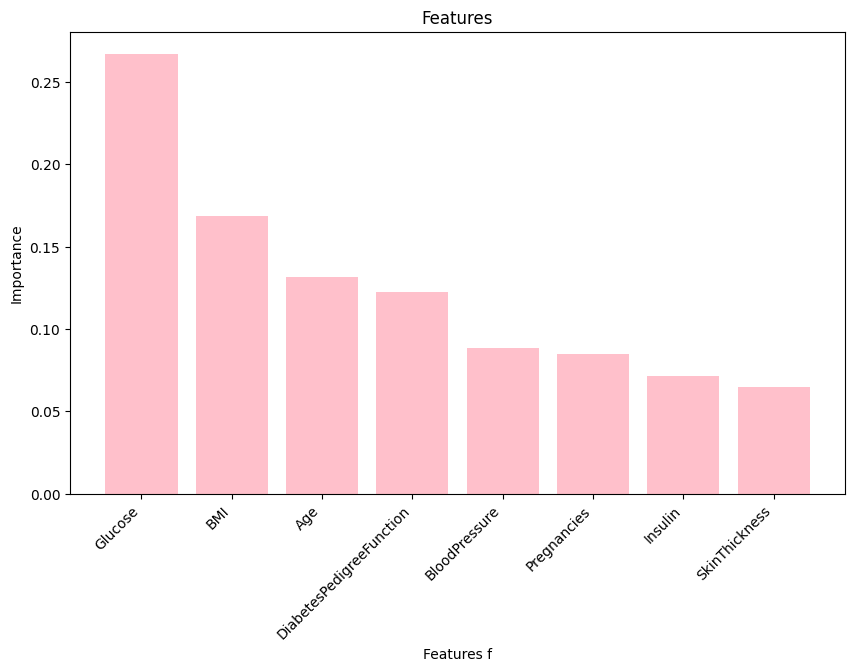

In [38]:
# 4.3 Feature Importance using RandomForest
#Train the previously defined randomforest classifier model.
#use feature_importances_ and sort the features in descending order
#Create a bar plot to show the sorted features
# --- Your Code Starts Here ---
rf.fit(numerical_f, t)
feature_importances = rf.feature_importances_
sorted_df = pd.DataFrame({
    'Feature': numerical_f.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


print("Feature Importances:")
print(sorted_df)

#Creating  a bar
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['Feature'], sorted_df['Importance'], color='pink')
plt.title('Features')
plt.xlabel('Features f')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

# --- Your Code Ends Here ---


## 5. Model Building for Comparison (Simple RandomForest Model)

Building a simple Random Forest model for comparison serves as a crucial step in evaluating the effectiveness of feature selection methods. It provides a baseline performance to compare against, helps to assess the impact of selected features on model performance, and allows you to identify whether feature selection leads to a more efficient and generalizable model. By comparing the performance of models with and without feature selection, you can make informed decisions about the optimal features to include in your final model.

In [42]:
# 5. Model Building for Comparison (Simple RandomForest Model)
#Split the dataset into training and testing sets with a 70/30 split
#(using random_state=42 for reproducibility), train a RandomForest model
# using the training data, and then evaluate the model's accuracy on the testing data.
# Print the achieved accuracy.
# Try the model performance with only selected features and with all features.
# --- Your Code Starts Here ---

from sklearn.model_selection import cross_val_score
f_all = scaled_df.drop(columns=['Outcome', 'BMI_Classification'])
y = scaled_df['Outcome']

features_selected = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
f_selected = scaled_df[features_selected]

# For all features
f_all_train, f_all_test, y_train, y_test = train_test_split(f_all, y, test_size=0.3, random_state=42)

# For selected features
f_selected_train, f_selected_test, y_train_selected, y_test_selected = train_test_split(f_selected, y, test_size=0.3, random_state=42)

# Traiing the model with all features
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(f_all_train, y_train)
y_all_pred = rf_all.predict(f_all_test)

#Training the model with selected features
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(f_selected_train, y_train_selected)
y_selected_pred = rf_selected.predict(f_selected_test)

accuracy_all = accuracy_score(y_test, y_all_pred)
accuracy_selected = accuracy_score(y_test_selected, y_selected_pred)

print("accuracy using all features:", accuracy_all)
print("accuracy using selected features:", accuracy_selected)


# --- Your Code Ends Here ---


accuracy using all features: 0.7575757575757576
accuracy using selected features: 0.7532467532467533
